# Proyecto 14
--- 


**Descripción del proyecto**

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

**Tienes que:**

- Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
- Analizar los factores que más impactan la pérdida.
- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
- identificar a los grupos objetivo;
- sugerir medidas para reducir la rotación;
- describir cualquier otro patrón que observes con respecto a la interacción con los clientes.



## Paso 1. Llevar a cabo el análisis exploratorio de datos (EDA)


In [1]:
# Importamos Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans


In [2]:
# Cargamos Archivos
df = pd.read_csv('/datasets/gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método describe()).

In [4]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [5]:
df.groupby("Churn").mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

In [6]:
def histograma(x, group_col, key_col):
    x_new = x.copy()
    x_new[key_col] = df[key_col]

    for c in  key_col:
        for cl in x [group_col].unique():
            sns.histplot(x_new[x_new[group_col] == cl][c],
                         label='{} = {}'.format(group_col,cl), bins=10, kde=True)
        plt.title(c)
        plt.legend()
        plt.show()
                 

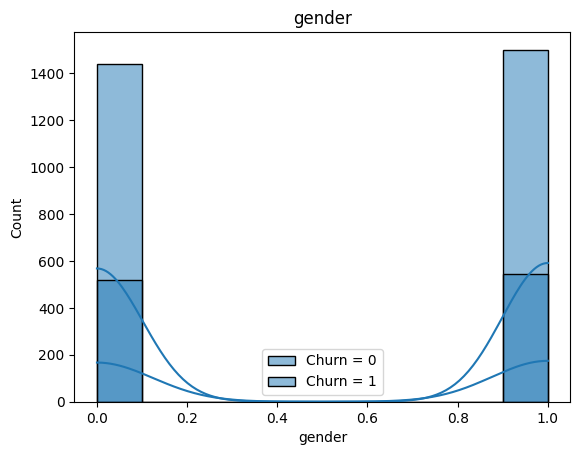

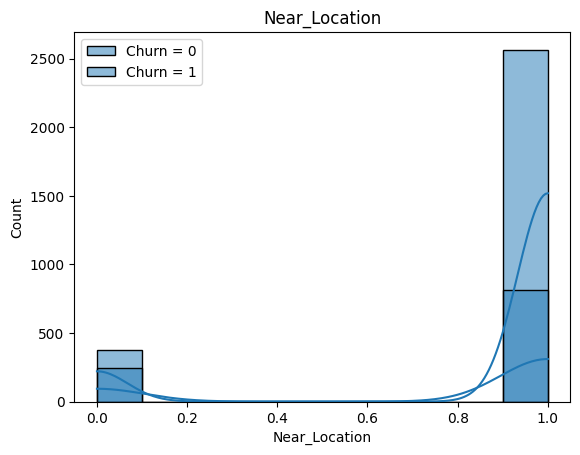

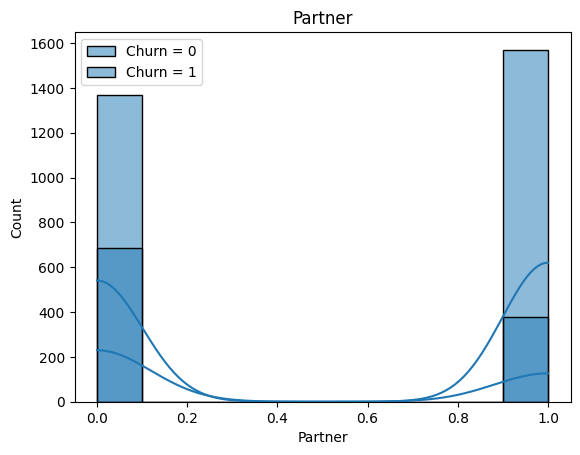

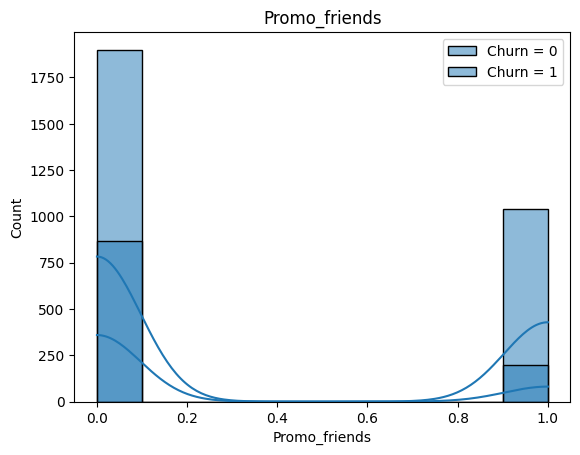

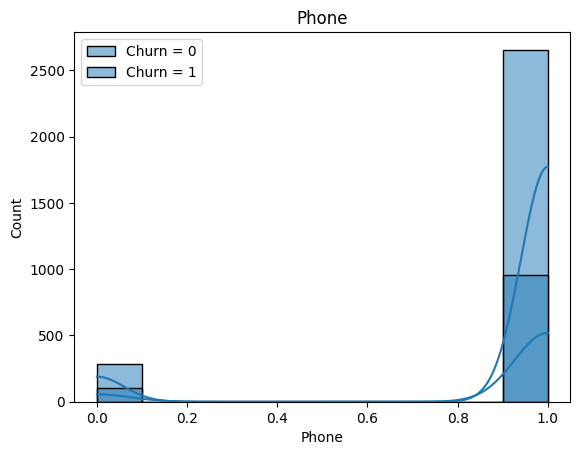

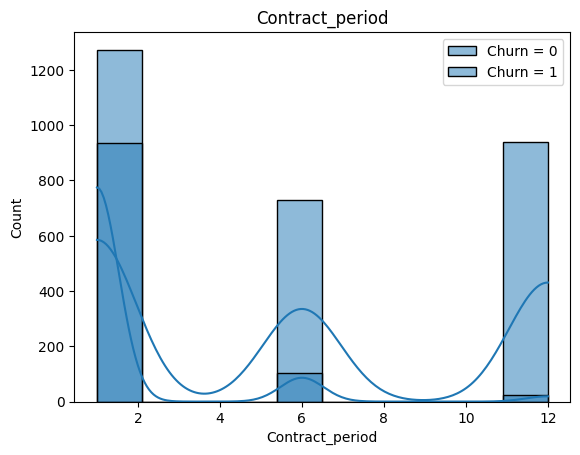

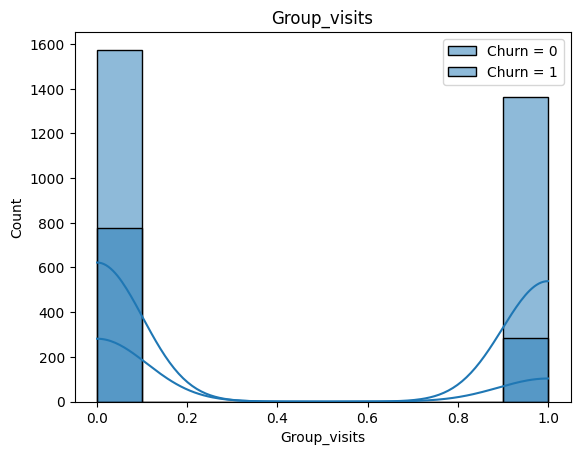

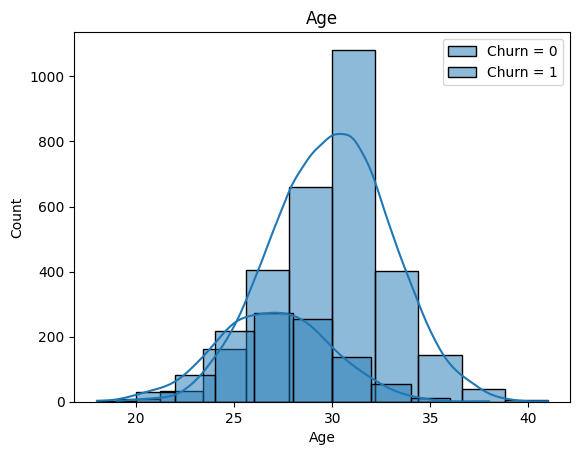

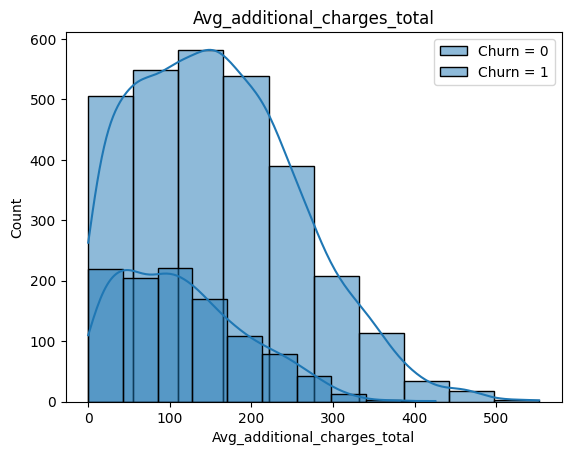

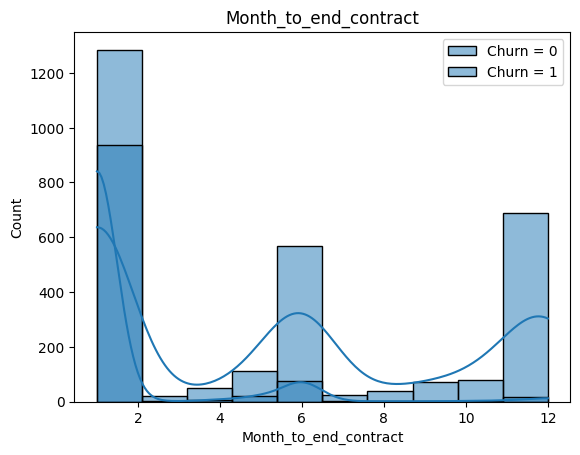

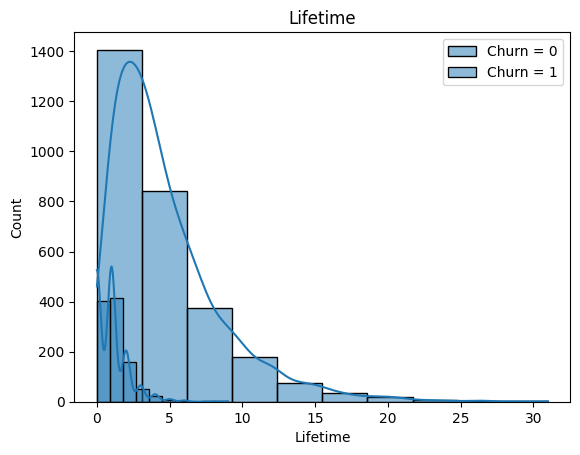

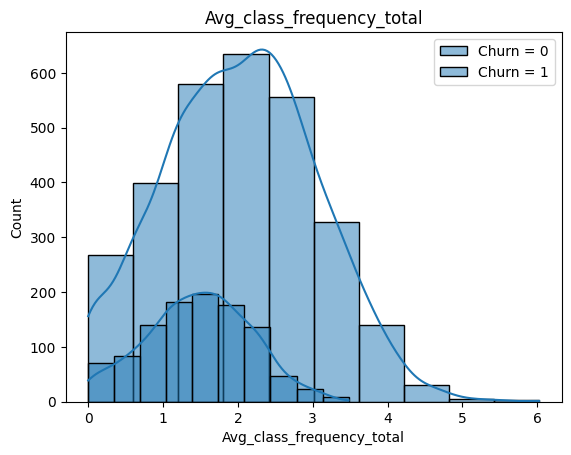

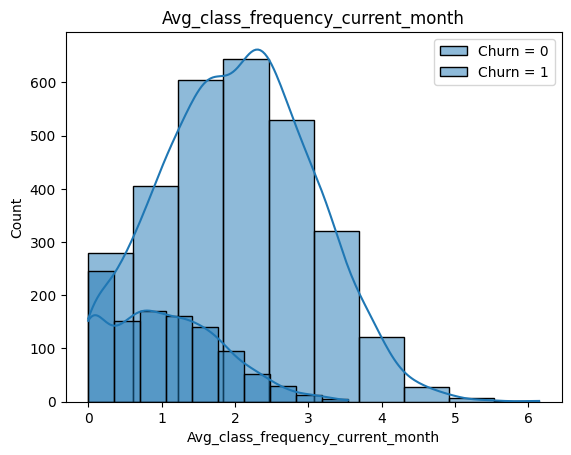

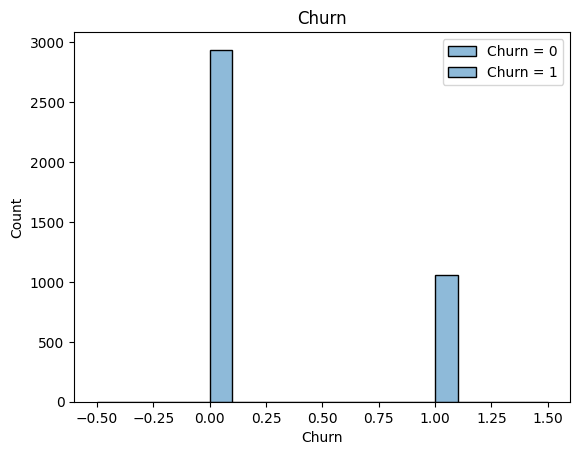

In [7]:
histograma(df, 'Churn', df.columns)

Crea una matriz de correlación y muéstrala.


In [8]:
df.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


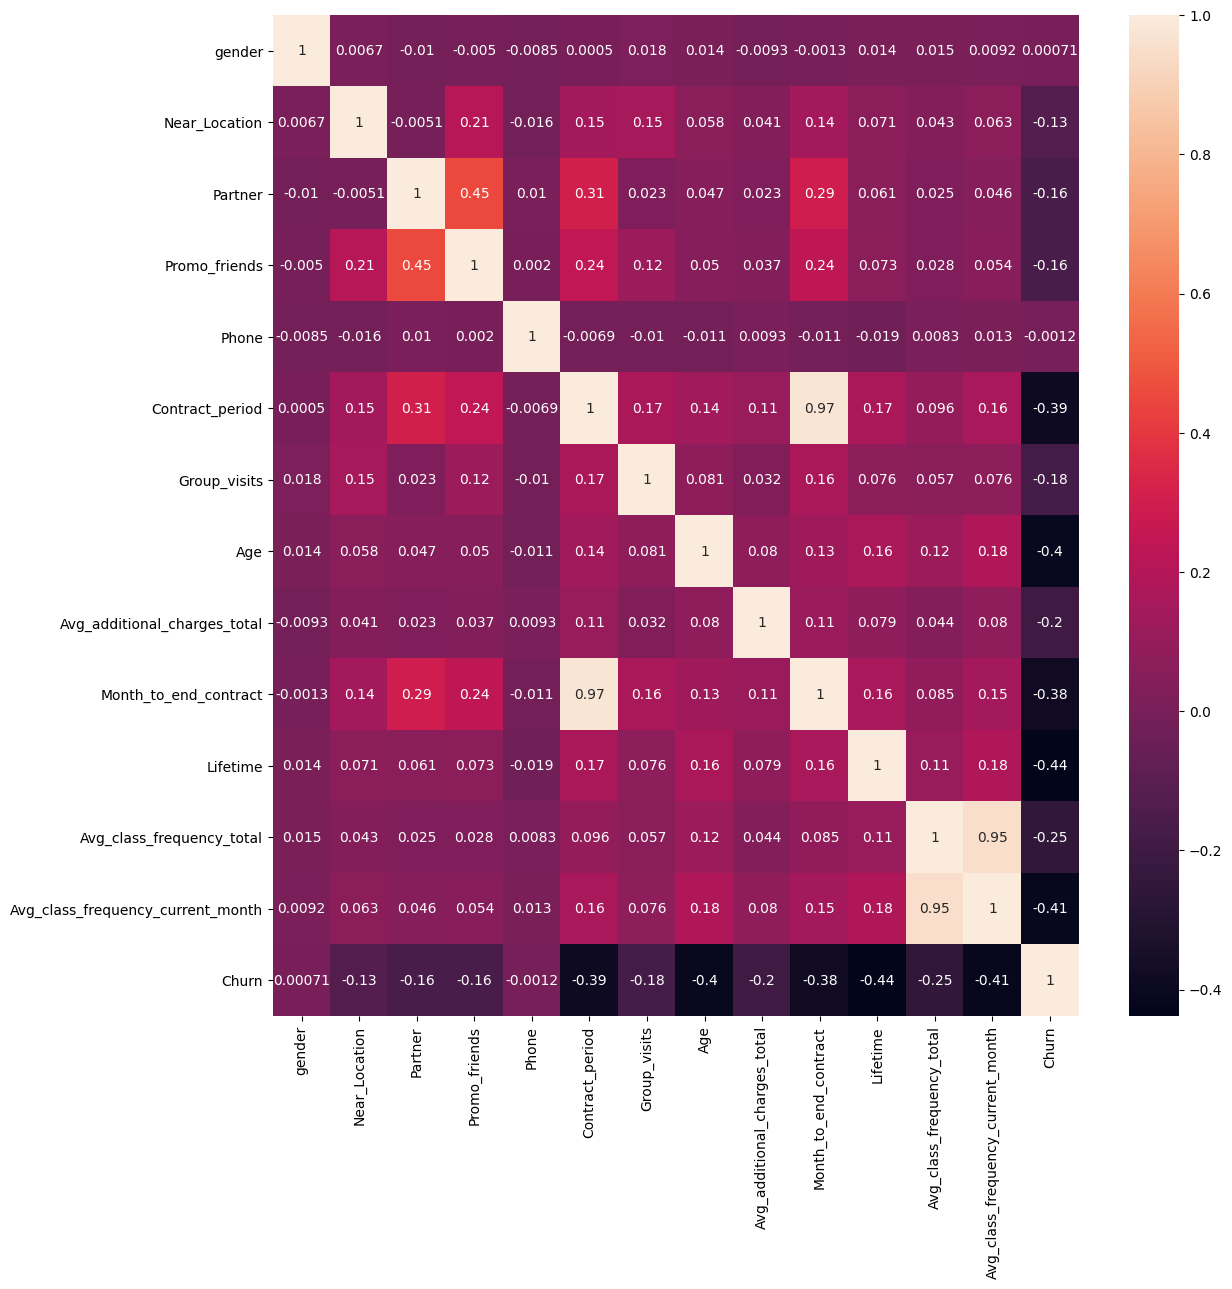

In [9]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Paso 3. Construir un modelo para predecir la cancelación de usuarios


In [10]:
# --- 1) Preparar X, y
# Asumo que la columna objetivo se llama 'Churn' (según tu df.info aparece 'Churn' como int64).
# Si se llama distinto, cámbialo aquí.
target = 'Churn'
if target not in df.columns:
    raise ValueError(f"No encontré la columna objetivo '{target}' en df.columns. Cambia target si es necesario.")

X = df.drop(columns=[target])
y = df[target]

# --- 2) Dividir en train/validation
# Usamos stratify para mantener proporciones de la clase en ambos sets, y random_state fijo.
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# --- 3) Modelos
# Regresión logística (pipeline con escalado)
pipe_log = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Bosque aleatorio
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# --- 4) Entrenar
pipe_log.fit(X_train, y_train)
rf.fit(X_train, y_train)

# --- 5) Predecir en validación
y_pred_log = pipe_log.predict(X_val)
y_pred_rf  = rf.predict(X_val)

# --- 6) Métricas: exactitud (accuracy), precisión (precision), recall
def resumen_metricas(y_true, y_pred, modelo_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    print(f"--- {modelo_name} ---")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification report:")
    print(classification_report(y_true, y_pred, zero_division=0))
    print()

resumen_metricas(y_val, y_pred_log, "Regresión Logística")
resumen_metricas(y_val, y_pred_rf,  "Random Forest")

# Opcional: comparar métricas en un DataFrame
summary = pd.DataFrame([
    {'model':'LogisticRegression',
     'accuracy':accuracy_score(y_val, y_pred_log),
     'precision':precision_score(y_val, y_pred_log, zero_division=0),
     'recall':recall_score(y_val, y_pred_log, zero_division=0)},
    {'model':'RandomForest',
     'accuracy':accuracy_score(y_val, y_pred_rf),
     'precision':precision_score(y_val, y_pred_rf, zero_division=0),
     'recall':recall_score(y_val, y_pred_rf, zero_division=0)}
])
print(summary)

--- Regresión Logística ---
Accuracy:  0.9190
Precision: 0.8680
Recall:    0.8189
Confusion matrix:
[[702  33]
 [ 48 217]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       735
           1       0.87      0.82      0.84       265

    accuracy                           0.92      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.92      0.92      0.92      1000


--- Random Forest ---
Accuracy:  0.9170
Precision: 0.8792
Recall:    0.7962
Confusion matrix:
[[706  29]
 [ 54 211]]
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       735
           1       0.88      0.80      0.84       265

    accuracy                           0.92      1000
   macro avg       0.90      0.88      0.89      1000
weighted avg       0.92      0.92      0.92      1000


                model  accuracy  precision    recall
0  Lo

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
</div>

## Paso 4. Crear clústeres de usuarios/as


In [11]:
# 1) Quitamos la variable objetivo (Churn) porque no se usa en clustering
X = df.drop(columns=['Churn'])

# 2) Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

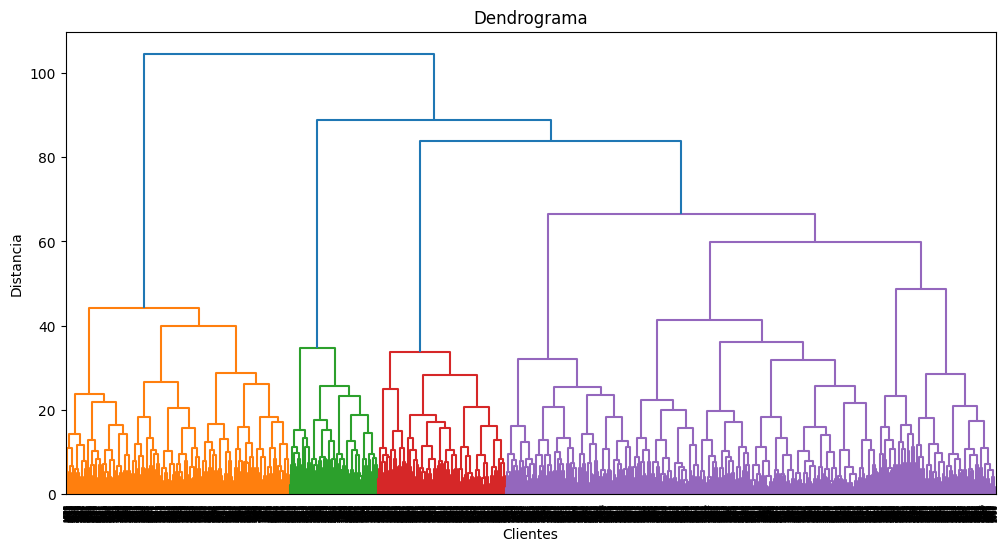

In [12]:

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()

In [13]:

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Añadimos la información de clúster al dataframe original
df['cluster'] = clusters

In [14]:
df.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.502370,0.949447,0.829384,0.998420,1.0,3.097946,0.448657,29.104265,141.774331,2.887836,3.772512,1.770536,1.669581,0.246445
1,0.554556,0.849269,0.263217,0.052868,1.0,2.606299,0.436445,30.008999,159.774265,2.419573,4.780652,2.745505,2.733173,0.089989
2,0.499422,0.937572,0.737572,0.478613,1.0,11.854335,0.546821,29.905202,163.509804,10.812717,4.677457,2.006405,1.998179,0.021965
3,0.485738,0.718011,0.299919,0.018745,1.0,1.914425,0.276284,28.083945,129.496414,1.821516,2.195599,1.225192,0.967967,0.572942
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839


<AxesSubplot:xlabel='cluster', ylabel='Group_visits'>

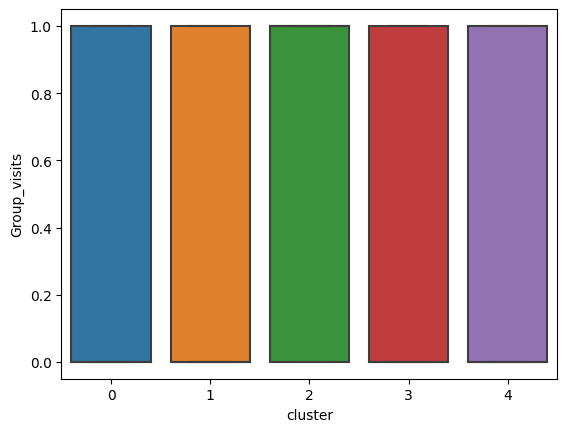

In [15]:
sns.boxplot(x='cluster', y='Group_visits', data=df)


In [16]:
df.groupby('cluster')['Churn'].mean()

cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64

Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes


1) Tenemos que tener prioridad con los clientes nuevos mientras se van acostumbrando ya que muchas personas se van por la falta de empatia, y acompanamiento que sienten.
2) Muchas personas van a socializar, es por esa razon que debemod hacer actividades grupales para que las personas se unan mas.
3) A los clientes que llevan mucho tiempo con nosotros, hay que darles incentivos, eso hara que su fidelidad aumente.
4) Si vemos que alguien se va a ir, o simplemente hay s